# TODO: 
- pos_post
- perspective 
- clean up and unify style

In [16]:
import praw
import pandas as pd
import datetime as dt
from pprint import pprint
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
reddit = praw.Reddit(client_id='WevHHtSbQkc1Kw',
                     client_secret='iy1yLWvIUf5O7sRGLEZjLHBcqRU',
                     user_agent='tmdtest',
                     username='shakingkelly',
                     password='GAZErocktte67-')

## Play around with reddit instance

In [3]:
print(reddit.read_only)

False


In [19]:
subreddit = reddit.subreddit('redditdev')

print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development
print(subreddit.description)   # Output: A subreddit for discussion of ...

redditdev
reddit Development
A subreddit for discussion of reddit API clients.

* [Read the API Overview & Rules](https://github.com/reddit/reddit/wiki/API)
* [Check out the API documentation](http://www.reddit.com/dev/api)
* For PRAW related chat visit: https://gitter.im/praw-dev/praw
* [Join us on IRC: `#reddit-dev` on irc.freenode.net](http://webchat.freenode.net/?channels=reddit-dev) (see also: [a log of previous conversations](https://botbot.me/freenode/reddit-dev/))
* Please do not request bots here. Consider /r/requestabot instead.


Please confine discussion to reddit's API instead of using this as a soapbox to talk to the admins. In particular, use [/r/ideasfortheadmins](/r/ideasfortheadmins) for feature ideas and [/r/bugs](/r/bugs) for bugs. If you have general reddit questions, try [/r/help](/r/help).

To see an explanation of recent user-facing changes to reddit (and the code behind them), check out /r/changelog.

---

To report a security issue with reddit, please send an 

In [58]:
print(reddit.user.me())

shakingkelly


In [25]:
submission = reddit.submission(id='b2imw0')
submission.author

Redditor(name='juliassimulation')

In [46]:
for comment in reddit.redditor('odintal').comments.new(limit=10):
    print(comment.body)

Redditor(name='ValedictorianBaller')

## Observe data

In [3]:
path = '/users/sjx/desktop/'
df = pd.read_csv(path + 'soc-redditHyperlinks-title.tsv', sep='\t')
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


In [4]:
print(len(df[df['LINK_SENTIMENT'] == 1].index)/df.shape[0])

0.8930982450557501


In [6]:
df.shape

(571927, 6)

In [17]:
df.iloc[16]

SOURCE_SUBREDDIT                                       subredditdrama
TARGET_SUBREDDIT                                                  nfl
POST_ID                                                        1u58yq
TIMESTAMP                                         2013-12-31 21:59:32
LINK_SENTIMENT                                                     -1
PROPERTIES          165.0,135.0,0.781818181818,0.0,0.0666666666667...
Name: 16, dtype: object

In [18]:
for comment in post.comments:
    print(comment.body)

At first I typed out a comment about how butthurt Penn State fans are, but I realized that might not be very tasteful. [But we like to make jokes here, right?](http://cdn.bleacherreport.net/images_root/images/photos/001/449/442/southpark_crop_340x234.jpg?1321560453)
Where was the rape joke? 
SnapShots: [1](http://archive.is/2twN9), [2](http://hiyo.jp/cache/of/2014-01-01-15-31-24/http://www.reddit.com/r/nfl/comments/1u4y8q/bill_obrien_to_coach_houston_texans/ceejsk1), [*^Readability*](http://www.readability.com/read?url=http%3A//archive.is/2twN9)
No rape joke, not sure if disappointing or happy...


Removed: Only post links if you are not the source of the drama or directly involved in the drama.




Much Big Ten privilege. Many upset over those invalidated wins. Wow.


In [19]:
# BFS
post.comments.replace_more(limit=None)
for comment in post.comments.list():
    print(comment.body)

At first I typed out a comment about how butthurt Penn State fans are, but I realized that might not be very tasteful. [But we like to make jokes here, right?](http://cdn.bleacherreport.net/images_root/images/photos/001/449/442/southpark_crop_340x234.jpg?1321560453)
Where was the rape joke? 
SnapShots: [1](http://archive.is/2twN9), [2](http://hiyo.jp/cache/of/2014-01-01-15-31-24/http://www.reddit.com/r/nfl/comments/1u4y8q/bill_obrien_to_coach_houston_texans/ceejsk1), [*^Readability*](http://www.readability.com/read?url=http%3A//archive.is/2twN9)
No rape joke, not sure if disappointing or happy...


Removed: Only post links if you are not the source of the drama or directly involved in the drama.




Much Big Ten privilege. Many upset over those invalidated wins. Wow.
The jokes write themselves 
I get the feeling OP is a moron...if the "rape joke" was the lions fan saying they care
About football more than molestation then the OP totally missed the point, that wasn't a joke it was the s

In [31]:
type(reddit.redditor('spez'))

praw.models.reddit.redditor.Redditor

In [4]:
post = reddit.submission(id = df['POST_ID'][342])
post.permalink

NotFound: received 404 HTTP response

In [5]:
df[df['LINK_SENTIMENT'] == -1].SOURCE_SUBREDDIT.value_counts()

subredditdrama           7550
bestof                   3464
drama                    2172
circlebroke2             1642
shitpost                 1308
shitstatistssay           928
shitredditsays            877
evenwithcontext           771
srssucks                  736
botsrights                730
shitamericanssay          717
gamingcirclejerk          611
fitnesscirclejerk         602
thebluepill               560
topmindsofreddit          495
worstof                   472
badphilosophy             458
enoughlibertarianspam     445
the_donald                430
againstkarmawhores        365
conspiracy                362
shitliberalssay           360
shitpoliticssays          345
japancirclejerk           339
againsthatesubreddits     334
metacanada                326
switcharoo                324
thepopcornstand           315
publichealthwatch         298
mensrights                285
                         ... 
waronchristmas              1
socialistsouth              1
59s       

In [6]:
df[df['LINK_SENTIMENT'] == -1].TARGET_SUBREDDIT.value_counts()

askreddit               2474
worldnews               1314
news                    1234
pics                    1111
todayilearned           1047
videos                  1028
funny                   1018
adviceanimals            828
politics                 732
wtf                      669
subredditdrama           628
the_donald               533
iama                     521
gifs                     481
gaming                   463
twoxchromosomes          455
conspiracy               435
tifu                     425
relationships            381
showerthoughts           344
movies                   330
legaladvice              314
explainlikeimfive        302
technology               299
atheism                  279
socialism                273
canada                   271
pcmasterrace             266
kotakuinaction           253
nottheonion              245
                        ... 
cityporn                   1
kindred                    1
sanders2trump              1
haruhi        

## Neg Comment DF

In [4]:
neg = df[df['LINK_SENTIMENT'] == -1]
pos = df[df['LINK_SENTIMENT'] == 1]
print(neg.shape[0], pos.shape[0])

61140 510787


In [32]:
neg_not_found = 0
# pos_not_found = 0
neg_post = []
# pos_post = []

for i in range(neg.shape[0]):
    try:
        post = reddit.submission(id = neg['POST_ID'][i])
        neg_post.append(neg['POST_ID'][i])
    except:
        neg_not_found += 1
print('neg_post', len(neg_post))
print('neg_not_found', neg_not_found)

# for i in range(pos.shape[0]):
#     try:
#         post = reddit.submission(id = pos['POST_ID'][i])
#         pos_post.append(pos['POST_ID'][i])
#     except:
#         pos_not_found += 1
# print('pos_post', len(pos_post))
# print('pos_not_found', pos_not_found)

neg_post 6657
neg_not_found 54483
pos_post 456051
pos_not_found 54736


In [90]:
# test

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [14]:
results = []

post.comments.replace_more(limit=None)
for comment in post.comments.list():
    pol_score = sia.polarity_scores(comment.body)
    pol_score['comment'] = comment.body
    try:
        if comment.author == None:
            pol_score['author'] = 'NA'
        else:
            temp = comment.author.id
            pol_score['author'] = comment.author.name
    except:
        pol_score['author'] = 'not found - ' + comment.author.name
#     pol_score['author'] = comment.author
    pol_score['submission'] = comment.submission.id
    pol_score['upvote'] = comment.score
    pol_score['is_submitter'] = comment.is_submitter
    pol_score['subreddit_id'] = comment.subreddit_id
    results.append(pol_score)

pprint(results, width=100)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'author': 'NA',
  'comment': '[removed]',
  'compound': 0.0,
  'is_submitter': False,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'submission': '1u6ori',
  'subreddit_id': 't5_2ss5b',
  'upvote': 48},
 {'author': 'yasth',
  'comment': 'Someday I am going to post clips of Dumb and Dumber as a reason to laugh at Jim '
             "Carrey, because obviously /r/cringe couldn't tell. ",
  'compound': -0.296,
  'is_submitter': False,
  'neg': 0.204,
  'neu': 0.669,
  'pos': 0.127,
  'submission': '1u6ori',
  'subreddit_id': 't5_2ss5b',
  'upvote': 59},
 {'author': 'NA',
  'comment': 'EdgarAllenNope is right, any real partner could tell you that.\n'
             '\n'
             'Some people get so fucking butthurt when you tell them that big youtube names '
             'actually are making multimillions a year.',
  'compound': 0.0,
  'is_submitter': False,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'submission': '1u6ori',
  'subreddit_id': 't5_2ss5b',
  'upvote': 41},
 {'author': 'NA',

In [20]:
results = []
i = 300
start = time.time()

for n in range(4, len(neg_post)//100 + 2):
    
    while i >= (n-1)*100 and i < n*100:
        try:
            if i % 100 == 0:
                print(time.time() - start)
                start = time.time()
            post = reddit.submission(id = neg_post[i])
            
            
            post.comments.replace_more(limit=None)
            

            for comment in post.comments.list():
                pol_score = sia.polarity_scores(comment.body)
                pol_score['comment'] = comment.body
                try:
                    pol_score['author'] = comment.author.name
                except:
                    pol_score['author'] = None
                pol_score['submission'] = comment.submission.id
                pol_score['upvote'] = comment.score
                pol_score['is_submitter'] = comment.is_submitter
                pol_score['subreddit_id'] = comment.subreddit_id
                try:
                    pol_score['submission_author'] = post.author.name
                except:
                    pol_score['submission_author'] = None
                results.append(pol_score)
            i += 1
        except Exception as e:
            print('Handling exception at', n, i)
            print(e)
            i += 1
            time.sleep(1)
        
    print(len(results))
    comment_df = pd.DataFrame.from_records(results)
    comment_df.to_csv('comment_df_' + str(n) + '.csv')
    print('saved to file', n)

    results = []

    #         try:
    #             if comment.author == None:
    #                 pol_score['author'] = 'NA'
    #             else:
    #                 temp = comment.author.id
    #                 pol_score['author'] = comment.author.name
    #         except:
    #             pol_score['author'] = 'not found - ' + comment.author.name

In [22]:
all_df = []
for i in range(1, 68):
    all_df.append(pd.read_csv('comment_df_' + str(i) + '.csv', index_col=0))
df = pd.concat(all_df, ignore_index=True)
df.to_csv('neg_comments.csv')                

In [21]:
t = pd.read_csv('comment_df_1.csv', index_col=0)
t.head()

,author,comment,compound,is_submitter,neg,neu,pos,submission,submission_author,subreddit_id,upvote
0,ValedictorianBaller,At first I typed out a comment about how butth...,0.7278,False,0.000,0.810,0.190,1u58yq,sw33n3y,t5_2ss5b,7
1,odintal,Where was the rape joke?,-0.5423,False,0.475,0.303,0.222,1u58yq,sw33n3y,t5_2ss5b,6
2,ttumblrbots,"SnapShots: [1](http://archive.is/2twN9), [2](h...",0.0000,False,0.000,1.000,0.000,1u58yq,sw33n3y,t5_2ss5b,1
3,CantaloupeCamper,"No rape joke, not sure if disappointing or hap...",-0.6167,False,0.501,0.226,0.273,1u58yq,sw33n3y,t5_2ss5b,1
4,TheReasonableCamel,\n\nRemoved: Only post links if you are not th...,0.0000,False,0.000,1.000,0.000,1u58yq,sw33n3y,t5_2ss5b,1


In [67]:
results

[{'neg': 0.0,
  'neu': 0.81,
  'pos': 0.19,
  'compound': 0.7278,
  'comment': 'At first I typed out a comment about how butthurt Penn State fans are, but I realized that might not be very tasteful. [But we like to make jokes here, right?](http://cdn.bleacherreport.net/images_root/images/photos/001/449/442/southpark_crop_340x234.jpg?1321560453)',
  'author': Redditor(name='ValedictorianBaller'),
  'submission': '1u58yq',
  'upvote': 7,
  'is_submitter': False,
  'subreddit_id': 't5_2ss5b',
  'submission_author': Redditor(name='sw33n3y')},
 {'neg': 0.475,
  'neu': 0.303,
  'pos': 0.222,
  'compound': -0.5423,
  'comment': 'Where was the rape joke? ',
  'author': Redditor(name='odintal'),
  'submission': '1u58yq',
  'upvote': 4,
  'is_submitter': False,
  'subreddit_id': 't5_2ss5b',
  'submission_author': Redditor(name='sw33n3y')},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'comment': 'SnapShots: [1](http://archive.is/2twN9), [2](http://hiyo.jp/cache/of/2014-01-01-15-

In [70]:
comment_df = pd.DataFrame.from_records(results)
comment_df

,author,comment,compound,is_submitter,neg,neu,pos,submission,submission_author,subreddit_id,upvote
0,ValedictorianBaller,At first I typed out a comment about how butth...,0.7278,False,0.000,0.810,0.190,1u58yq,sw33n3y,t5_2ss5b,6
1,odintal,Where was the rape joke?,-0.5423,False,0.475,0.303,0.222,1u58yq,sw33n3y,t5_2ss5b,4
2,ttumblrbots,"SnapShots: [1](http://archive.is/2twN9), [2](h...",0.0000,False,0.000,1.000,0.000,1u58yq,sw33n3y,t5_2ss5b,1
3,CantaloupeCamper,"No rape joke, not sure if disappointing or hap...",-0.6167,False,0.501,0.226,0.273,1u58yq,sw33n3y,t5_2ss5b,1
4,TheReasonableCamel,\n\nRemoved: Only post links if you are not th...,0.0000,False,0.000,1.000,0.000,1u58yq,sw33n3y,t5_2ss5b,1
5,None,Much Big Ten privilege. Many upset over those ...,0.8126,False,0.133,0.357,0.510,1u58yq,sw33n3y,t5_2ss5b,-2
6,None,The jokes write themselves,0.2500,False,0.000,0.600,0.400,1u58yq,sw33n3y,t5_2ss5b,1
7,3kool5you,"I get the feeling OP is a moron...if the ""rape...",-0.4159,False,0.253,0.489,0.258,1u58yq,sw33n3y,t5_2ss5b,4
8,sw33n3y,"Correction: It was molestation, third comment...",-0.2732,True,0.248,0.598,0.154,1u58yq,sw33n3y,t5_2ss5b,1
9,ScuttlesMcAllister,Hilarious.,0.4019,False,0.000,0.000,1.000,1u5c58,Cheekio,t5_2w8st,5


## Submission DF

In [5]:
p = reddit.submission(id = '1u6ori')
print(p.title, p.name)

Fight breaks out in /r/Cringe over how much money a girl makes pretending to be stupid on Youtube. t3_1u6ori


In [ ]:
pos_post = []
pos_not_found = 0
pos_no_title = 0
pos_id_list = pos['POST_ID'].tolist()

for i in range(pos.shape[0]):
# for i in range(50):
    try:
        post = reddit.submission(id = pos_id_list[i])
        try:
            print(post.id)
            print(post.title)
            pos_post.append(pos_id_list[i])
        except:
            pos_no_title += 1        
    except:
        pos_not_found += 1
print('pos_post', len(pos_post))
print('pos_not_found', pos_not_found)
print('pos_no_title', pos_no_title)

1u4pzzs
1u4tmfs
1u4tmos
1u50xfs
1u51nps
1u5216s
1u53hzs
1u53lxs
1u55wws
1u56b3s
1u56bws
1u56qas
1u570zs
1u58d7s
1u58e6s
1u58kus
1u596as
1u5acws
1u5ag6s
1u5c84s
1u5cius
1u5cj7s
1u5cn2s
1u5dgns
1u5dkls
1u5e1ws
1u5fqds
1u5g6es
1u5g9ms
1u5iejs
1u5ivks
1u5jrss
1u5l86s
1u5lhas
1u5lres
1u5n4ns
1u5o32s
1u5oc5s
1u5owns
1u5pijs
1u5pn0s
1u5qkas
1u5qkis
1u5rjds
1u5ru5s
1u5si9s
1u5slvs
1u5st4s
1u5tjxs
1u5tvzs
1u5uv0s
1u5v21s
1u5ve3s
1u5vx9s
1u5wyjs
1u5y76s
1u5yk6s
1u5ylqs
1u5ynss
1u5z21s
1u5zvxs
1u60qfs
1u612ls
1u61crs
1u61gvs
1u61q7s
1u6419s
1u645bs
1u64aqs
1u64f8s
1u651es
1u6585s
1u65azs
1u65cas
1u65g2s
1u66o3s
1u68yxs
1u690vs
1u69f7s
1u69m9s
1u69qxs
1u69w0s
1u6a2ts
1u6agqs
1u6aoss
1u6atus
1u6b1ks
1u6b51s
1u6b8gs
1u6beis
1u6c18s
1u6cins
1u6dgbs
1u6dk9s
1u6ergs
1u6eu1s
1u6f7ts
1u6f7vs
1u6fhas
1u6gz0s
1u6h95s
1u6hers
1u6ho7s
1u6hres
1u6hrys
1u6i06s
1u6ilos
1u6iqys
1u6ishs
1u6j10s
1u6kr9s
1u6l7as
1u6l9cs
1u6llds
1u6ml9s
1u6mmcs
1u6msys
1u6n5rs
1u6nens
1u6njls
1u6novs
1u6nqzs
1u6nrrs
1u6oajs
1u6ol4s


1ui6xrs
1ui7zss
1ui80bs
1ui84xs
1ui87ws
1ui9hqs
1ui9nbs
1uiafds
1uiagqs
1uiauts
1uib39s
1uibj3s
1uiboms
1uidbrs
1uidcss
1uidlfs
1uiedzs
1uiekqs
1uigdis
1uigsns
1uigtgs
1uih6js
1uiilas
1uiilhs
1uiit6s
1uij9ss
1uijsns
1uik33s
1uik9os
1uikz5s
1uil5rs
1uim3ps
1uimyws
1uinhks
1uioies
1uip3rs
1uipbls
1uipo3s
1uipx9s
1uiq9js
1uiqbls
1uiqfls
1uir42s
1uirc9s
1uirfms
1uirw4s
1uis03s
1uis0xs
1uisi2s
1uislos
1uismbs
1uisnts
1uiss3s
1uisvhs
1uisyos
1uit1ws
1uit2ks
1uit8js
1uittss
1uitvls
1uiu19s
1uiu9bs
1uiug8s
1uiul7s
1uivams
1uivdvs
1uivzos
1uiwwps
1uixqls
1uixsrs
1uiy12s
1uiy3js
1uiy57s
1uiyoss
1uizkks
1uizxzs
1uj09zs
1uj0u4s
1uj0y1s
1uj1bys
1uj24ls
1uj3dts
1uj4ohs
1uj5fas
1uj73ss
1uj7r6s
1uj7t6s
1uj81qs
1uj89ws
1uj98js
1uj9cgs
1uj9gbs
1uj9rys
1uj9zus
1uja8ds
1ujaa5s
1ujakus
1ujao7s
1ujb37s
1ujbe5s
1ujbn4s
1ujc6hs
1ujcc9s
1ujce5s
1ujcf5s
1ujcqxs
1ujd7os
1ujdfcs
1ujdnds
1ujeaws
1ujecbs
1ujed7s
1ujee2s
1ujeugs
1ujf6os
1ujf9ns
1ujfcvs
1ujfyxs
1ujgs0s
1ujh49s
1ujh5js
1ujh5us
1ujhc6s
1uji9us
1ujitzs


1ut7f1s
1ut82hs
1ut8e9s
1ut8nqs
1ut8sas
1ut933s
1ut9vss
1uta5ys
1utab3s
1utabps
1utakis
1utbn6s
1utc5ls
1utcais
1utccps
1utcfms
1utd6is
1utdmzs
1utdrrs
1utds4s
1utdtis
1uted5s
1uten5s
1utfn4s
1utgfas
1utgnns
1utgofs
1uthars
1uthrgs
1uti8ls
1utinvs
1utj30s
1utjk7s
1utk5ls
1utk6gs
1utk6zs
1utkb8s
1utkuls
1utl27s
1utm9gs
1utmgws
1utmojs
1utmoys
1utmq2s
1utmy8s
1utn5rs
1uto0ns
1utofys
1utp5ls
1utp9xs
1utpbks
1utpels
1utpgws
1utpx3s
1utpy5s
1utqdbs
1utqtas
1utrwps
1utsljs
1utti4s
1uttsds
1utty6s
1uttz8s
1utw3js
1utwg2s
1utwkys
1utwrfs
1uty34s
1uty6ys
1utye2s
1utyrxs
1utyv2s
1utzhjs
1utzoas
1utzvcs
1uu03cs
1uu0drs
1uu0pqs
1uu1fjs
1uu1w6s
1uu34es
1uu35vs
1uu4nps
1uu4ots
1uu5rys
1uu5t4s
1uu67ts
1uu6o9s
1uu6xes
1uu7jos
1uu7kgs
1uu831s
1uu8e6s
1uu8ris
1uu8sgs
1uu8wps
1uu8xxs
1uu93es
1uu970s
1uu975s
1uu97qs
1uu9b2s
1uu9bus
1uu9cts
1uu9nrs
1uua9zs
1uuab9s
1uuadds
1uuanfs
1uuaoes
1uub2js
1uubbes
1uuchks
1uuddns
1uudnps
1uudw7s
1uudxcs
1uue1os
1uue4es
1uuexns
1uuf9xs
1uufhas
1uufi5s
1uug8us
1uuh3cs


In [34]:
pos_sample_list = np.random.choice(pos_post, 7000)
pos_sample_list

array(['3up8its', '2x374os', '2g2g50s', ..., '54osfts', '32vzths',
       '4iafjss'], dtype='<U7')

In [30]:
pos_df = df[(df['POST_ID'].isin(pos_post)) & (df['LINK_SENTIMENT'] == 1)]
pos_df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


In [17]:
pos_sample_none = pos_df.sample(n=7000, random_state=1)['POST_ID'].tolist()

In [36]:
reddit.submission(id='3up8its')

Submission(id='3up8its')

In [28]:
results = []
start = time.time()
# all_pos_id = pos['POST_ID'].tolist()
all_id = df['POST_ID'].tolist()
cnt = 1
i = 0

# for i in range(len(pos_post)):
while cnt < 7000:
    if cnt % 100 == 0:
        print(time.time() - start)
        start = time.time()
#     print(pos_sample_list[i])
    i += 1
    post = reddit.submission(id = all_id[i])
    try:
        print(post.title)
        pol_score = sia.polarity_scores(post.title)
        pol_score['title'] = post.title
        pol_score['score'] = post.score
        pol_score['num_comments'] = post.num_comments
        results.append(pol_score)
        cnt += 1
    except Exception as e:
        print(e)
        print(i)
        time.sleep(1)
    
submission_df = pd.DataFrame.from_records(results)
submission_df.to_csv('submission_df.csv')
print('saved to file')

received 404 HTTP response
1
received 404 HTTP response
2
received 404 HTTP response
3
received 404 HTTP response
4
received 404 HTTP response
5
received 404 HTTP response
6
received 404 HTTP response
7
received 404 HTTP response
8
received 404 HTTP response
9
received 404 HTTP response
10
received 404 HTTP response
11
received 404 HTTP response
12
received 404 HTTP response
13
received 404 HTTP response
14


KeyboardInterrupt: 

## Neg post comment sentiment

In [8]:
negcdf = pd.read_csv('neg_comments.csv', index_col=0)
negcdf.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,author,comment,compound,is_submitter,neg,neu,pos,submission,submission_author,subreddit_id,upvote
0,ValedictorianBaller,At first I typed out a comment about how butth...,0.7278,False,0.0,0.81,0.19,1u58yq,sw33n3y,t5_2ss5b,7.0
1,odintal,Where was the rape joke?,-0.5423,False,0.475,0.303,0.222,1u58yq,sw33n3y,t5_2ss5b,6.0
2,ttumblrbots,"SnapShots: [1](http://archive.is/2twN9), [2](h...",0.0000,False,0.0,1.0,0.0,1u58yq,sw33n3y,t5_2ss5b,1.0
3,CantaloupeCamper,"No rape joke, not sure if disappointing or hap...",-0.6167,False,0.501,0.226,0.273,1u58yq,sw33n3y,t5_2ss5b,1.0
4,TheReasonableCamel,\n\nRemoved: Only post links if you are not th...,0.0000,False,0.0,1.0,0.0,1u58yq,sw33n3y,t5_2ss5b,1.0


In [5]:
negcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135667 entries, 0 to 135666
Data columns (total 11 columns):
author               103363 non-null object
comment              135662 non-null object
compound             135647 non-null float64
is_submitter         135647 non-null object
neg                  135647 non-null object
neu                  135646 non-null object
pos                  135644 non-null object
submission           135647 non-null object
submission_author    116562 non-null object
subreddit_id         135630 non-null object
upvote               135630 non-null float64
dtypes: float64(2), object(9)
memory usage: 12.4+ MB


In [9]:
negcdf.neg = negcdf.neg.astype(float)
negcdf.neu = negcdf.neu.astype(float)
negcdf.pos = negcdf.pos.astype(float)

ValueError: could not convert string to float: '1x15o4'

In [10]:
negcdf[negcdf.neg == '1x15o4']

,author,comment,compound,is_submitter,neg,neu,pos,submission,submission_author,subreddit_id,upvote
23391,False,0.264,0.541,0.195,1x15o4,NaN,t5_2qh3v,2,NaN,NaN,NaN


In [12]:
negcdf[negcdf.upvote.isnull()]

,author,comment,compound,is_submitter,neg,neu,pos,submission,submission_author,subreddit_id,upvote
23389,NaN,Vehicles are dangerous and people should respe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23391,False,0.264,0.541,0.195,1x15o4,NaN,t5_2qh3v,2,NaN,NaN,NaN
29964,panditji_reloaded,Now you know why Straya is dieveloped.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29965,0.0,False,0.000,1.0,0.0,1xs5tm,Le_Samurai,t5_2tif7,3,NaN,NaN
36676,crackbabyathletics,http://np.reddit.com/r/gifs/comments/1yp7ef/ka...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36677,0.4215,False,0.000,0.263,0.737,1yq1wu,hoobsher,t5_2tzax,6,NaN,NaN
36720,NaN,Woah.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36721,0.0,False,0.000,1.0,0.0,1yq3sj,brotz,t5_2rybl,2,NaN,NaN
51275,Aceofspades25,Pretty much...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
negcdf.drop(negcdf[negcdf.upvote.isnull()].index, inplace=True)
negcdf.shape

(135630, 11)

In [14]:
negcdf.neg = negcdf.neg.astype(float)
negcdf.neu = negcdf.neu.astype(float)
negcdf.pos = negcdf.pos.astype(float)

In [40]:
a = len(negcdf[negcdf['compound'] < -0.5].index)/negcdf.shape[0]
b = len(negcdf[negcdf['compound'] > 0.5].index)/negcdf.shape[0]
c = len(negcdf[(negcdf['compound'] >= -0.5) & (negcdf['compound'] <= 0.5)].index)/negcdf.shape[0]

In [39]:
x = np.arange(3)
values = [a, b, c]
plt.bar(x, values)
plt.xticks(x, ('neg', 'pos', 'neu'))
for i, v in enumerate(values):
    plt.text(v, i, str(round(v,2)), color='blue', fontweight='bold') 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """


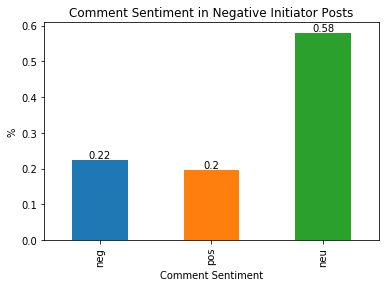

In [41]:
# Bring some raw data.
frequencies = [a, b, c]
# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series.from_array(frequencies)

x_labels = ['neg', 'pos', 'neu']

# Plot the figure.
plt.figure()
ax = freq_series.plot(kind='bar')
ax.set_title('Comment Sentiment in Negative Initiator Posts')
ax.set_xlabel('Comment Sentiment')
ax.set_ylabel('%')
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [round(frequencies[i],2) for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom')

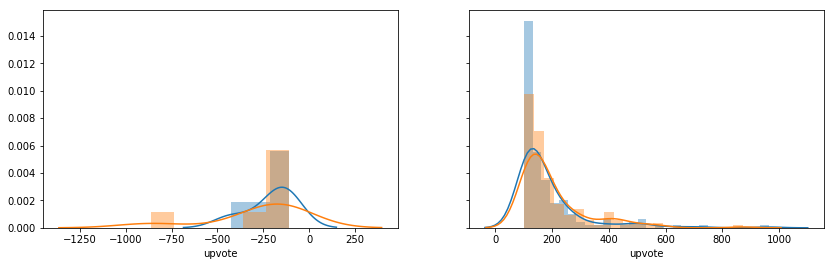

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4), sharey=True)
ax1 = sns.distplot(negcdf.loc[(negcdf['compound'] < -0.5) & (negcdf['upvote'] < -100), 'upvote'], ax=ax1)
ax1 = sns.distplot(negcdf.loc[(negcdf['compound'] > 0.5) & (negcdf['upvote'] < -100), 'upvote'], ax=ax1)
ax2 = sns.distplot(negcdf.loc[(negcdf['compound'] < -0.5) & (negcdf['upvote'] > 100), 'upvote'], ax=ax2)
ax2 = sns.distplot(negcdf.loc[(negcdf['compound'] > 0.5) & (negcdf['upvote'] > 100), 'upvote'], ax=ax2)

## Neg comment author

In [68]:
tmp = negcdf.loc[negcdf['compound'] < -0.5, ['author', 'subreddit_id']].drop_duplicates().dropna().sort_values(by=['author'])
tmp

,author,subreddit_id
53277,--hundy,t5_2qh3v
99723,--mt__,t5_2qh4r
103484,-Mass,t5_2qh3v
59515,-PaperbackWriter-,t5_2qh3v
117316,-Pin_Cushion-,t5_2tzlb
19558,-__--,t5_2rybl
78253,-katbyte,t5_2s4m9
27467,-momoyome-,t5_2qh3v
38853,-xyz,t5_2vzvv
53270,-zimms-,t5_2qh3v


In [71]:
list(reddit.info(['t5_2qh3v']))

[Subreddit(display_name='bestof')]

In [77]:
tmpcnt = tmp.author.value_counts().to_frame()
tmpcnt.columns = ['count']

In [82]:
tmpcnt[:100]

,count
autowikibot,21
totes_meta_bot,20
shitpostwhisperer,9
deathpigeonx,8
cordis_melum,8
EvanHarper,7
blarghable,7
5th_Law_of_Robotics,7
Slutlord-Fascist,7
SweetNyan,6


In [84]:
nca = tmpcnt[tmpcnt['count'] > 3].index.tolist()
nca

['autowikibot',
 'totes_meta_bot',
 'shitpostwhisperer',
 'deathpigeonx',
 'cordis_melum',
 'EvanHarper',
 'blarghable',
 '5th_Law_of_Robotics',
 'Slutlord-Fascist',
 'SweetNyan',
 '_watching',
 'robotevil',
 'turtleeatingalderman',
 'Biffingston',
 'oss_spy',
 'sleepy55',
 'redping',
 'FullClockworkOddessy',
 'ABadManComing',
 'Wrecksomething',
 'shellshock3d',
 'MechPlasma',
 'Jalor',
 'Nechaev',
 'Space_Ninja',
 'StrawRedditor',
 'Quietuus',
 'ugdr6424',
 'JaydenPope',
 'BRDtheist',
 'mrpopenfresh',
 'Intortoise',
 'derleth',
 'ValiantPie',
 'piyochama',
 'mwmwmwmwmmdw',
 'FallingSnowAngel',
 'Das_Mime',
 'othellothewise',
 'supergauntlet',
 'stoic_dogmeat',
 'bouchard',
 'barbadosslim',
 'frotc914',
 'ReBurnInator',
 'Angadar',
 'crazyex',
 'IAmSupernova',
 'Sir_Marcus',
 'InOranAsElsewhere',
 'FlamingBearAttack',
 'Raudskeggr',
 'PhysicsIsMyMistress',
 'Clark_Savage_Jr',
 'liatris',
 'snallygaster',
 'Knin',
 'chuckjustice',
 'porygon2guy',
 'ohgobwhatisthis',
 'macinneb',
 'Brows

In [91]:
authors = []
is_mod = []
avg_comment_score = []
avg_comment_sentiment = []

for a in nca:
    score = 0
    sentiment = 0
    
    print('\n--------------------------', a, '--------------------------')
    author = reddit.redditor(a)
    
    try:
        is_mod.append(author.is_mod)
        authors.append(a)
        
        for comment in author.comments.new(limit=100):
#             print(comment.body.split('\n', 1)[0])
            score += comment.score
            sentiment += sia.polarity_scores(comment.body)['compound']
        avg_comment_score.append(score/100)
        avg_comment_sentiment.append(sentiment/100)
        
        '''
        as a proxy of activeness???
        author.comments.new(limit=1)[0].created_utc
        ''' 
        
        print(authors[-1], is_mod[-1], avg_comment_score[-1], avg_comment_sentiment[-1])
    except Exception as e:
        print(e)



-------------------------- autowikibot --------------------------
autowikibot True 1.63 0.21285499999999996

-------------------------- totes_meta_bot --------------------------
totes_meta_bot True 3.86 0.033076999999999995

-------------------------- shitpostwhisperer --------------------------
shitpostwhisperer False 1.8 -0.07047999999999999

-------------------------- deathpigeonx --------------------------
deathpigeonx True 4.94 0.07021799999999999

-------------------------- cordis_melum --------------------------
cordis_melum True 4.66 0.6805040000000001

-------------------------- EvanHarper --------------------------
EvanHarper True 0.58 -0.0052179999999999805

-------------------------- blarghable --------------------------
blarghable False 11.11 0.08749499999999998

-------------------------- 5th_Law_of_Robotics --------------------------
5th_Law_of_Robotics True 6.19 -0.066753

-------------------------- Slutlord-Fascist --------------------------
received 404 HTTP response

porygonzguy True 3.57 0.032549999999999996

-------------------------- TAKEitTOrCIRCLEJERK --------------------------
TAKEitTOrCIRCLEJERK True 2.66 0.058905000000000006

-------------------------- Theophagist --------------------------
Theophagist True 1.99 -0.010866000000000004

-------------------------- HistoryLessonforBitc --------------------------
HistoryLessonforBitc True 6.71 0.008480000000000005

-------------------------- ShillForMonsanto --------------------------
ShillForMonsanto False 1.25 -0.06477299999999998

-------------------------- RandsFoodStamps --------------------------
received 404 HTTP response

-------------------------- Majorbookworm --------------------------
Majorbookworm False 6.01 -0.004988999999999975

-------------------------- SpermJackalope --------------------------
SpermJackalope True 3.05 0.11150099999999995

-------------------------- m0rris0n_hotel --------------------------
m0rris0n_hotel True 148.92 0.219962

-------------------------- DonQuixo

In [94]:
ncadf = pd.DataFrame(data={'author':authors, 'is_mod':is_mod, 'avg_comment_score':avg_comment_score, 'avg_comment_sentiment':avg_comment_sentiment})
ncadf.to_csv('neg_comment_authors.csv')
ncadf

,author,is_mod,avg_comment_score,avg_comment_sentiment
0,autowikibot,True,1.63,0.212855
1,totes_meta_bot,True,3.86,0.033077
2,shitpostwhisperer,False,1.80,-0.070480
3,deathpigeonx,True,4.94,0.070218
4,cordis_melum,True,4.66,0.680504
5,EvanHarper,True,0.58,-0.005218
6,blarghable,False,11.11,0.087495
7,5th_Law_of_Robotics,True,6.19,-0.066753
8,SweetNyan,True,11.32,0.061958
9,_watching,True,5.91,0.078976


([<matplotlib.axis.XTick at 0x1259c6cc0>,
 <a list of 2 Text xticklabel objects>)

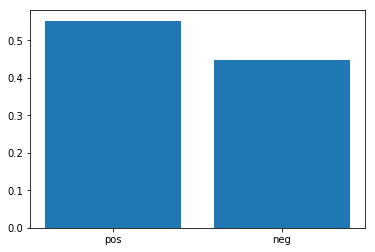

In [95]:
x = np.arange(2)
a = len(ncadf[ncadf['avg_comment_sentiment'] > 0].index)/ncadf.shape[0]
b = len(ncadf[ncadf['avg_comment_sentiment'] < 0].index)/ncadf.shape[0]
values = [a, b]
plt.bar(x, values)
plt.xticks(x, ('pos', 'neg'))

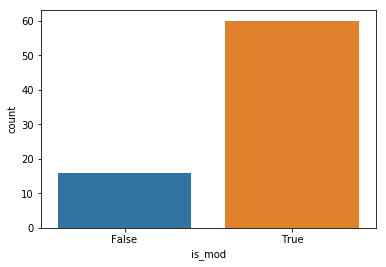

In [96]:
sns.countplot(x='is_mod', data=ncadf)
# 感覺這個似乎有的可以說？？？